<a href="https://colab.research.google.com/github/rohit-s-s/Grip_Intership/blob/main/Data_Exploration_on_dataset_Sample_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRIP: The Sparks Foundation**

# **Task 3**
# Exploratory Data Analysis - Retail

Performing *Exploratory Data Analysis* on given data set

Author : Rohith SS


In [5]:
#Impoting libraries
import pandas as pd
import numpy as np
import seaborn as sns;sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing dataset
store_df =pd.read_csv('SampleSuperstore.csv')


In [8]:
store_df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**INSPECTION**

In [9]:
store_df.shape

(9994, 13)

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
#Checking null counts
pd.DataFrame(store_df.isnull().sum(),columns =['Number of missing Values'])

,Number of missing Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [14]:
#Checkin the Unique Values
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Cleaning the Data**

**Removing the Column Country**

In [15]:
store_df.duplicated()
store_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [16]:
store_df.duplicated().sum()

17

In [17]:
store_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [18]:
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [19]:
store_df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [20]:
store_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
data = store_df.drop_duplicates(keep='first')

In [22]:
dt=store_df.sort_values(by='Sales',ascending=False)

In [23]:
dt.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [24]:
dt.shape

(9994, 13)

**EXPLORATORY DATA ANALYSIS**

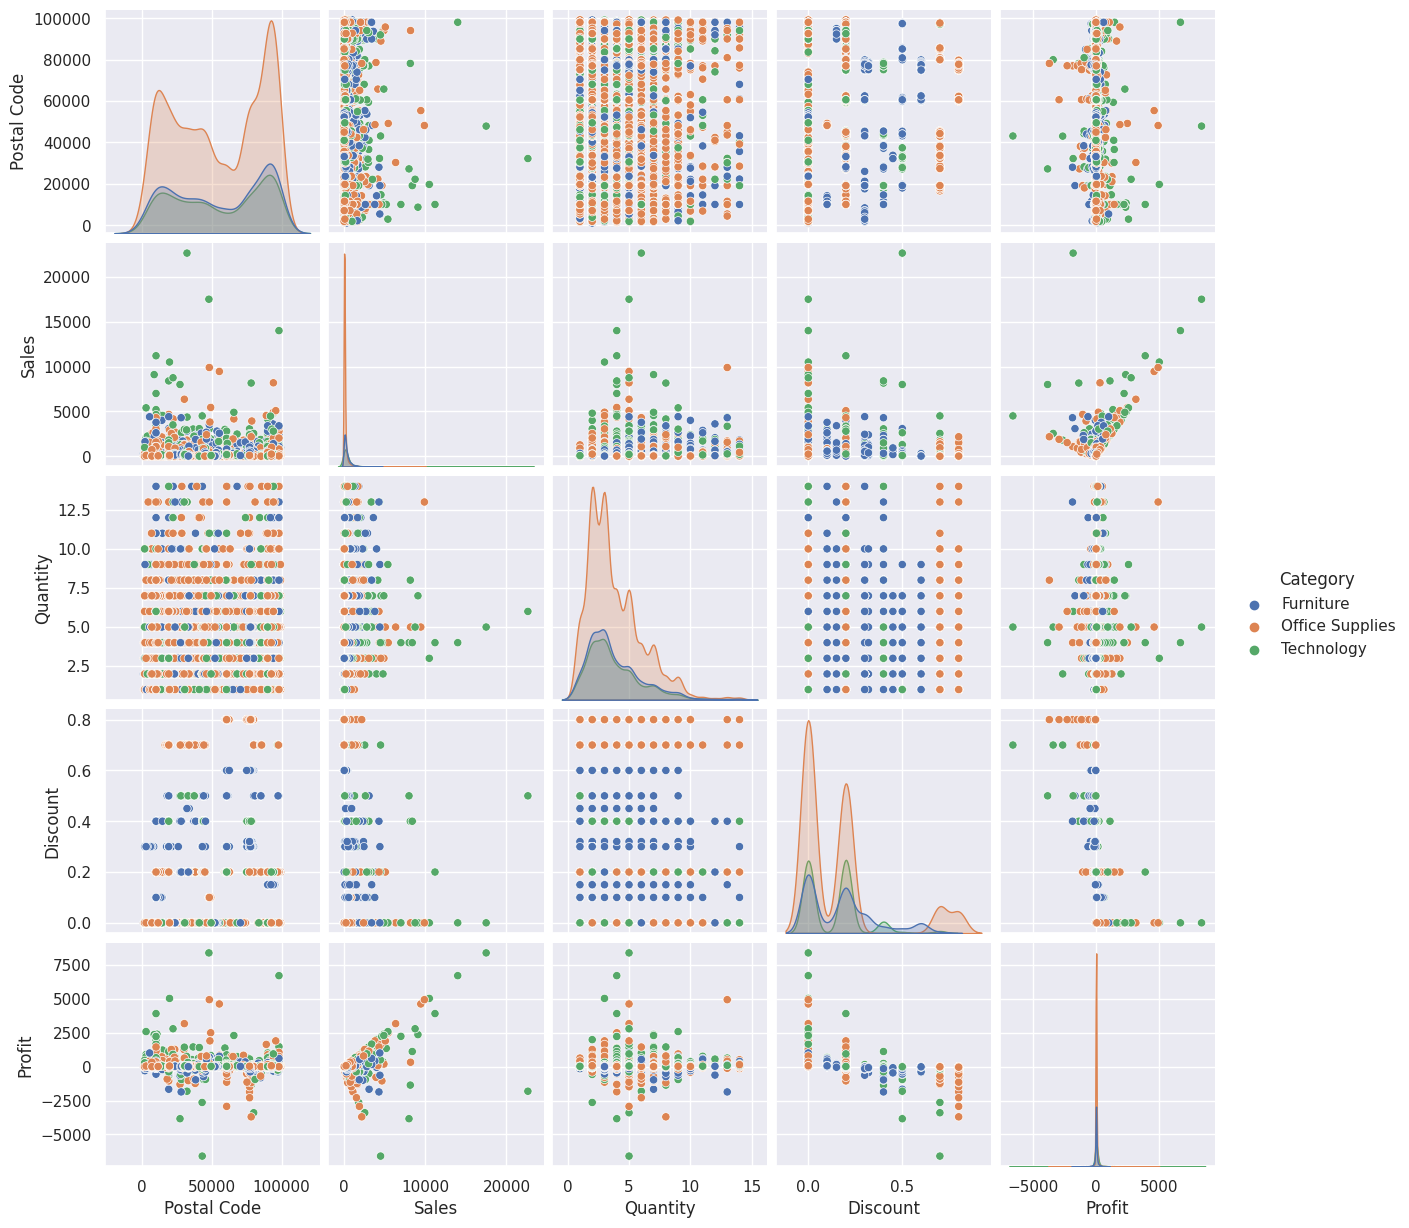

In [25]:
sns.pairplot(store_df, hue="Category")

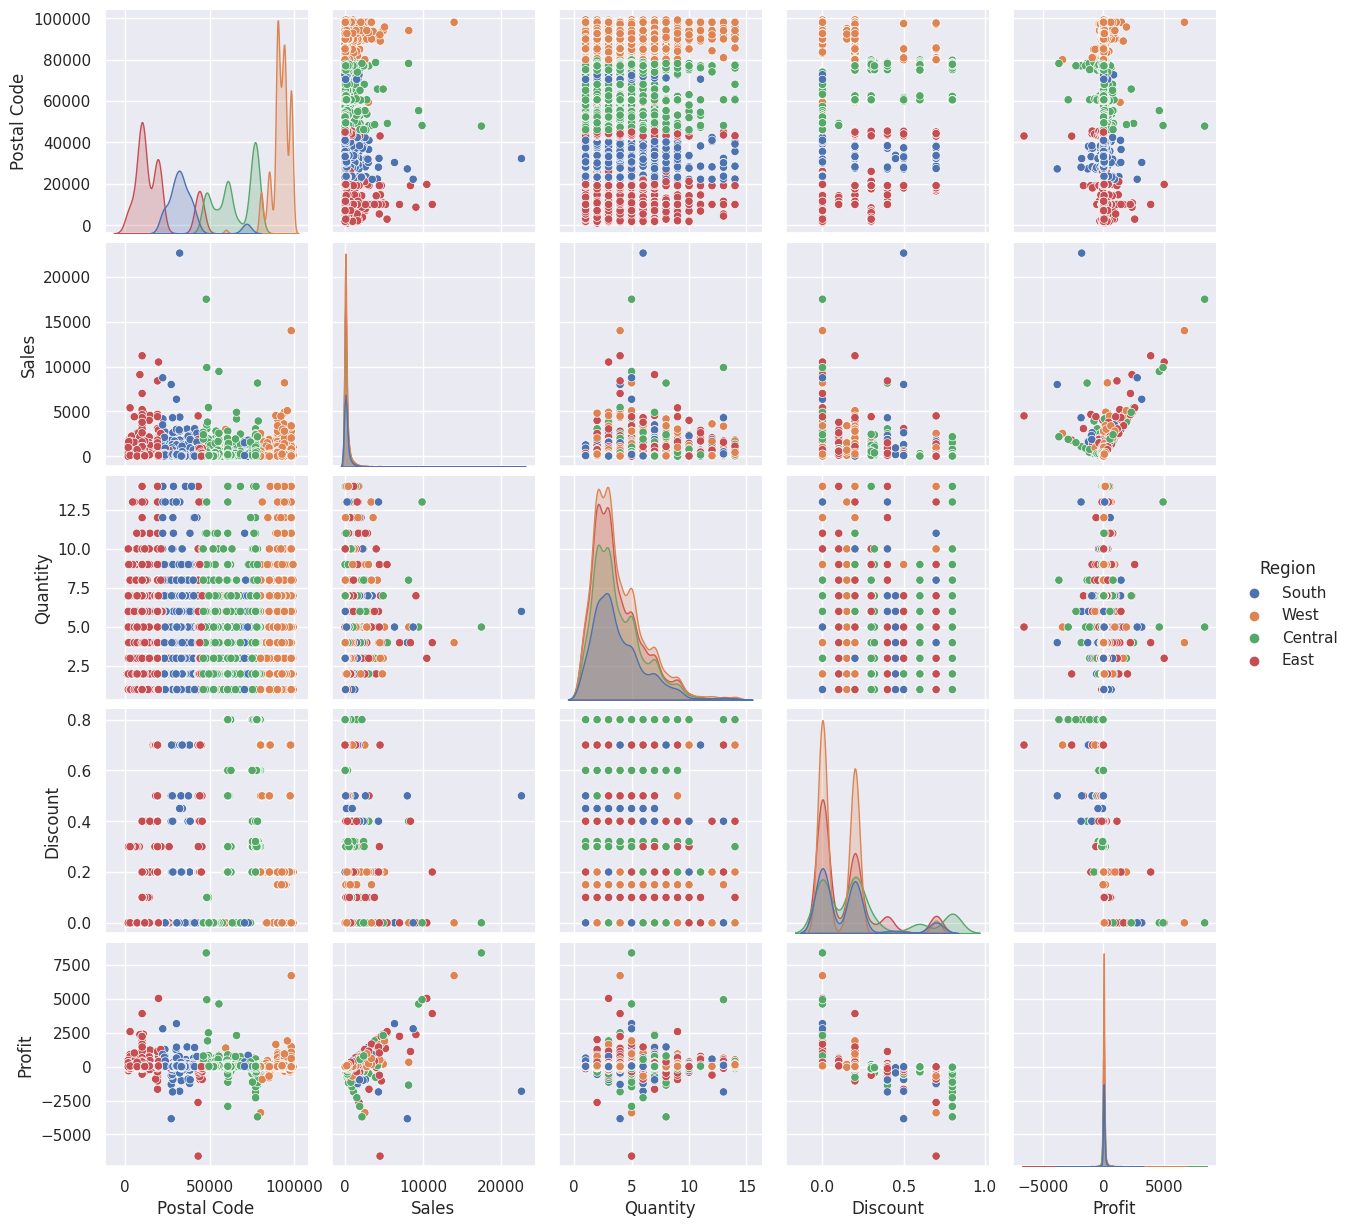

In [26]:
sns.pairplot(store_df, hue="Region")

In [27]:
#Check correlation
subset=store_df[['Postal Code','Sales','Quantity','Discount','Profit']]
corr_matrix = subset.corr()
print(corr_matrix)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


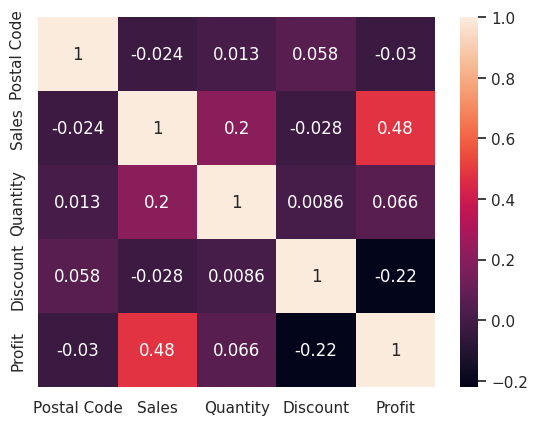

In [28]:
subset=store_df[['Postal Code','Sales','Quantity','Discount','Profit']]
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Here,brightest colours shows the strong correlation and dark colours shows no correlation

**From the heatmap,we can infer the following points:**

Sales and Profit are moderately related

Discount and Profit are negatively related

Quantity and profit are less moderately correlated

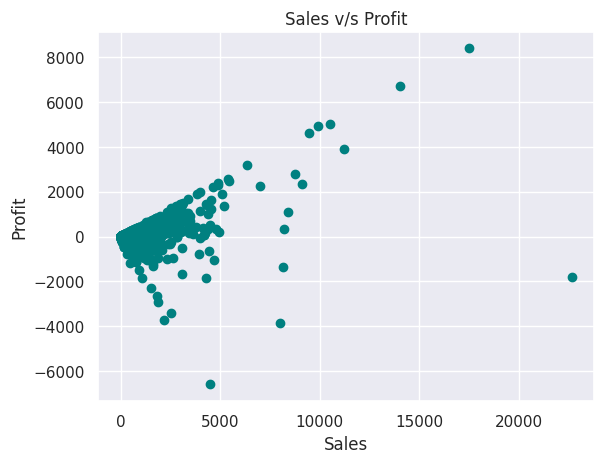

In [29]:
plt.scatter(store_df['Sales'],store_df['Profit'],c ='Teal')     
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()     

In [30]:
(store_df['Ship Mode'].value_counts()/store_df.shape[0])*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Count'>

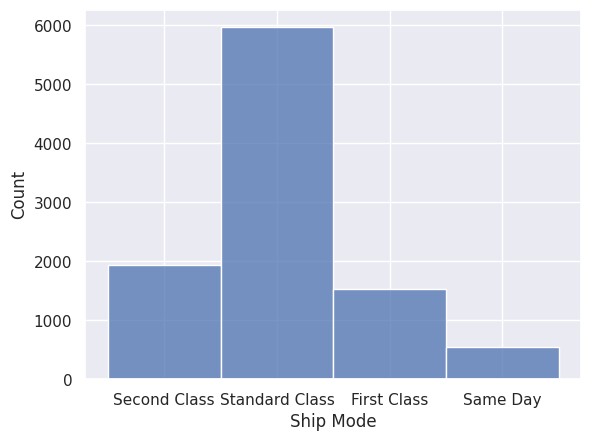

In [31]:
sns.histplot(store_df['Ship Mode'])

In [32]:
(store_df['Segment'].value_counts()/store_df.shape[0])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

<Axes: xlabel='Segment', ylabel='Count'>

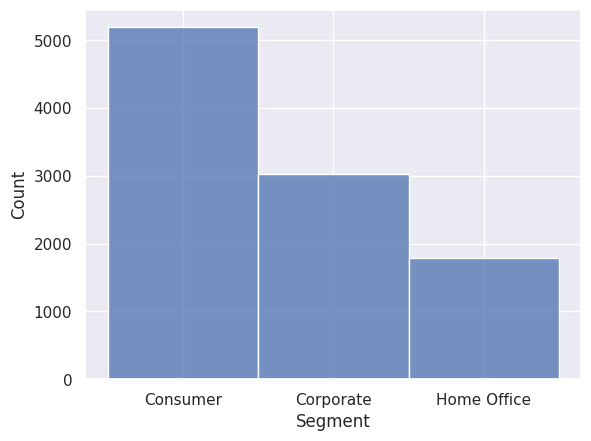

In [33]:
sns.histplot(store_df['Segment'])

In [34]:
(store_df['Category'].value_counts()/store_df.shape[0])*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<Axes: xlabel='Category', ylabel='Count'>

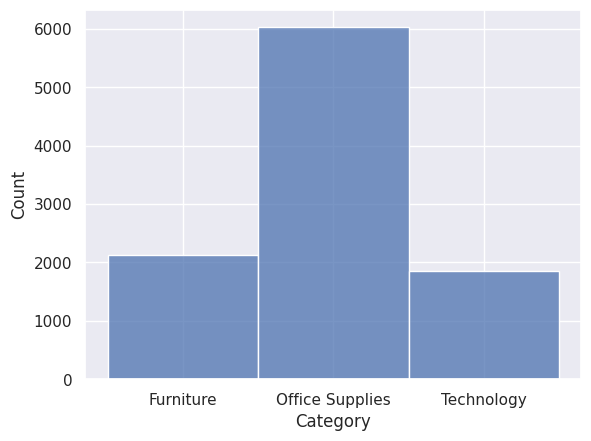

In [35]:
sns.histplot(store_df['Category'])

In [36]:
(store_df['Sub-Category'].value_counts()/store_df.shape[0])*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

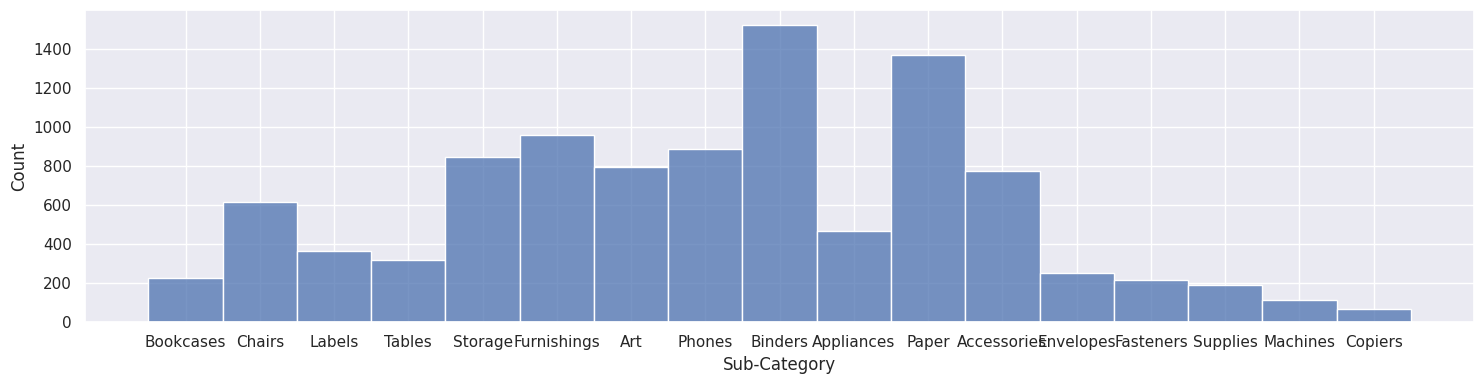

In [37]:
sns.histplot(store_df['Sub-Category'])
plt.gcf().set_size_inches(15,4)
plt.tight_layout()

<Axes: xlabel='Category'>

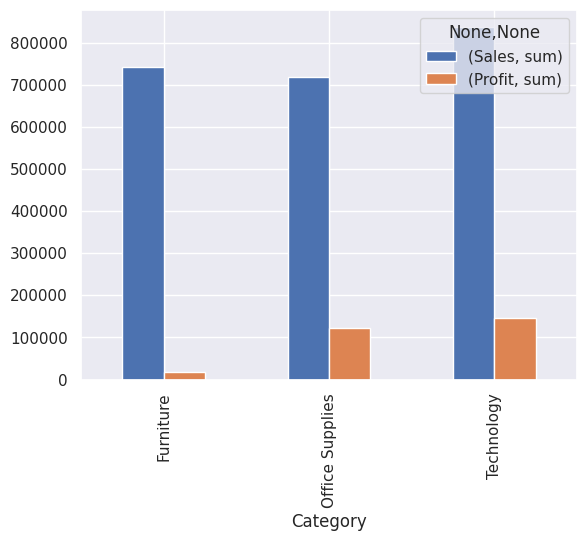

In [38]:
store_df.groupby('Category')[['Sales','Profit']].agg(['sum']).plot.bar()

In [39]:
non_numeric_cols = store_df.select_dtypes(exclude=['int' , 'float']).columns
print(non_numeric_cols)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')


In [40]:
store_df.pivot_table(values = 'Profit',index = 'Segment', columns = 'Discount' ,aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


In [41]:
store_df.pivot_table(values = 'Sales',index = 'Segment', columns = 'Discount' ,aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


**CONCLUTION**

Company is offering more Discount on Office Suppliers and Furniture category.

The maximum quantity of product in demand was in range 2-4.

The mode of shipping does not affect much to the sales

Correlation matrix shows positive relationship between Profit&Sales,Quantity&Sales.